# Handling Numerical Missing Data:

## Mean & Median Impuataion:

Mean, Median are measures of the central tendency. These values are used to define the various parameters of the given data set. The measure of central tendency (Mean, Median) gives useful insights about the data studied, these are used to study any type of data such as the average salary of employees in an organization, the median age of any class, etc.

**Measures of Central Tendency:**
Measure of central tendency is the representation of various values of the given data set. There are various measures of central tendency and the most important three measures of central tendency are:

- Mean
- Median

**Mean (x̅ or μ):** The mean, or arithmetic average, is calculated by summing all the values in a dataset and dividing by the total number of values. It’s sensitive to outliers and is commonly used when the data is symmetrically distributed.

The formula to calculate the mean is:

Mean (x̅)  = Sum of Values / Number of Values


**Median (M):** The median is the middle value when the dataset is arranged in ascending or descending order. If there’s an even number of values, it’s the average of the two middle values. The median is robust to outliers and is often used when the data is skewed.

The formula for the median is:

If the number of values (n value) in the data set is odd then the formula to calculate the median is:

Median = [(n + 1)/2]th term

## Import Libraries:

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset:

In [36]:
df=pd.read_csv('../Numerical_data_imputation/data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [37]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  18679 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  float64
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  training_hours          18392 non-null  float64
 12  target                  19158 non-null  float64
dtypes: float64(4), int64(1), object(8)
memory usage: 1.9+ MB


,enrollee_id,city_development_index,experience,training_hours,target
count,19158.000000,18679.000000,19093.000000,18392.000000,19158.000000
mean,16875.358179,0.828951,9.928036,65.185787,0.249348
std,9616.292592,0.123334,6.505268,59.885626,0.432647
min,1.000000,0.448000,0.000000,1.000000,0.000000
25%,8554.250000,0.740000,4.000000,23.000000,0.000000
50%,16982.500000,0.903000,9.000000,47.000000,0.000000
75%,25169.750000,0.920000,16.000000,88.000000,0.000000
max,33380.000000,0.949000,20.000000,336.000000,1.000000


In [38]:
print(df.isnull().sum())
print(df.isnull().mean()*100)

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64
enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64


In [39]:
df=df.select_dtypes(include=np.number)
df

,enrollee_id,city_development_index,experience,training_hours,target
0,8949,0.920,20.0,36.0,1.0
1,29725,0.776,15.0,47.0,0.0
2,11561,0.624,5.0,83.0,0.0
3,33241,0.789,0.0,52.0,1.0
4,666,0.767,20.0,8.0,0.0
...,...,...,...,...,...
19153,7386,0.878,14.0,42.0,1.0
19154,31398,0.920,14.0,52.0,1.0
19155,24576,0.920,20.0,44.0,0.0
19156,5756,0.802,0.0,97.0,0.0


**CONDITION TO USE**
- Data missing completely at random (MCAR).
- Missing data <5%.

In [40]:
# Extract those columns which lies in that condition.

df1=[col for col in df.columns if 0 < df[col].isnull().mean() * 100 < 5]
df1

['city_development_index', 'experience', 'training_hours']

**I choose experience column**

In [41]:
#Drop remaining columns

df.drop(columns=['enrollee_id','city_development_index','training_hours','target'],inplace=True)

In [42]:
# Now check weather the data is (MCAR) or not.

df.loc[df['experience'].isnull()].head(50)

,experience
135,NaN
391,NaN
1589,NaN
2727,NaN
2859,NaN
3086,NaN
3564,NaN
3760,NaN
4003,NaN
4207,NaN


**So both condition true on experience column**

**Now check**
- Distribution of data Before and After imputation.
- Check the covarience.
- Check correlation of data. 
- Make boxplot to check outliers.

**Check DIstribution**

**DO's and Don'ts**
- If distribution is change after impution their is red flag.
- if not green flag ('Slightly change in distribution is ok').

In [43]:
# Lets check which options is better for impuate missing values on numerical data.

mean_exp=df['experience'].mean()
median_exp=df['experience'].median()

print('mean of exp is',mean_exp)
print('median of exp is',median_exp)

mean of exp is 9.92803645315037
median of exp is 9.0


In [44]:
# Fill both to check which is best for imputation.

df['exp_mean']=df['experience'].fillna(mean_exp)
df['exp_median']=df['experience'].fillna(median_exp)

df.isnull().sum()

experience    65
exp_mean       0
exp_median     0
dtype: int64

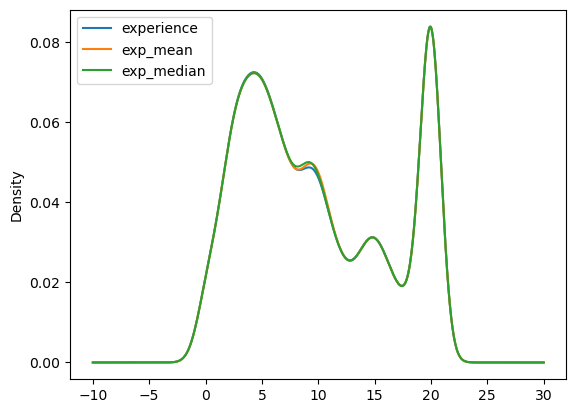

In [45]:
plt.figure
ax=plt.subplot(1,1,1)

df['experience'].plot(kind='kde')
df['exp_mean'].plot(kind='kde')
df['exp_median'].plot(kind='kde')

ax.legend()

**Nothing changes in distribution we are good to go** 

**Check Varience**

**Do's & Don'ts**
- If varience is changed drasticly then red flag
- if little bit of same then green flag.

In [46]:
# Check Varience

print('Original data varience',df['experience'].var())
print('After mean data varience',df['exp_median'].var())
print('After median data varience',df['exp_mean'].var())

Original data varience 42.31851676548554
After mean data varience 42.177841703224644
After median data varience 42.17492937759826


**Check Correlation**

**Do's & Don'ts
- If the correlation from original column is changed drasticly then red flag
- If slighter then green flag.

In [47]:
# Check correlation

df.corr()

,experience,exp_mean,exp_median
experience,1.0,1.000000,1.000000
exp_mean,1.0,1.000000,0.999965
exp_median,1.0,0.999965,1.000000


**Make Boxplot to check after imputation impacte of outliers**

<Axes: >

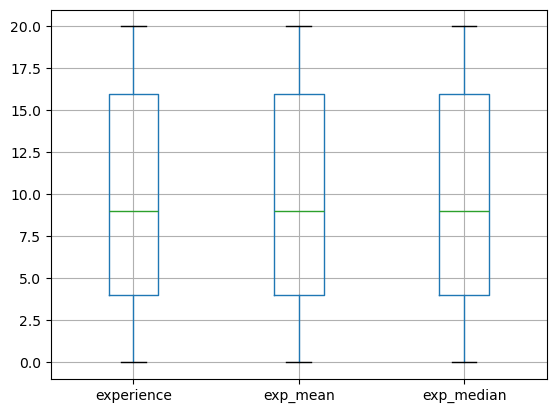

In [48]:
# Make Boxplot to check outliers impact after impuataion:

df[['experience','exp_mean','exp_median']].boxplot()

**All points are ok with both mean and median impuatation,so we can select any of one to impute i preferd median**